# Trabalho Prático 1
## Algoritmos Geométricos
**Proposta:** Envoltória Convexa como algoritmo de classificação  
**Desenvolvedores:**
- Pedro de Oliveira Guedes
- Gabriel Bifano Fredi
- Tarcísio Augusto Santos Lafaiete

# Introdução
Este trabalho prático tem como motivação a aplicação prática dos algoritmos geométricos estudados durante as aulas de Algoritmos II, buscando a fixação do conhecimento. Para obter essa fixação, o trabalho prático propõe a utilização dos algoritmos estudados para a construção de um classificador de conjuntos de dados bidimensionais.  
  
Para que o objetivo proposto por este trabalho seja alcançado, será desenvolvida uma série de algoritmos com funções distintas que, quando combinados, tornarão a classificação de pontos em um espaço bidimensional possível, apesar de pouco precisa. Devem ser desenvolvidos algoritmos para os seguintes propósitos:
1. Encontrar a envoltória convexa de um conjunto de pontos;
2. Determinar se duas envoltórias convexas se cruzam ou se sobrepõem;
3. Encontrar uma equação linear que separe duas envoltórias através dos pontos mais próximos entre elas;
4. Classificar um conjunto de pontos de acordo com a equação de separabilidade linear obtida.
  
Após a execução de todos os algoritmos criados para satisfazer os propósitos anteriormente apresentados, a classificação obtida será avaliada de acordo com as métricas de: "*precisão*", "*revocação*" e "*f1-escore*". Para a avaliação dos algoritmos criados, serão utilizados 10 *datasets*, divididos entre 3 *datasets* gerados de forma aleatória e 7 *datasets* do mundo real.  

> **Observação!!!**
>
> Apesar do projeto estar contido no GitHub, apenas com *commits* do desenvolvedor **Pedro de Oliveira Guedes**, os desenvolvedores **Gabriel Bifano Freddi** e **Tarcísio Augusto Santos Lafaiete** também contribuíram.
>
> Devido à facilidade de colaboração e sincronização das mudanças feitas, o projeto foi desenvolvido através da ferramenta Google Colaboratory, que apresenta histórico de versionamento que pode comprovar a participação dos demais membros. O link de acesso ao documento está presente a seguir:
>
> https://colab.research.google.com/drive/1Nq27LWqeeOx6UqG1sGAeG3G_xZUARWP4?usp=sharing

Ao fim da execução deste trabalho, espera-se que o entendimento de algoritmos geométricos obtidos ao longo da disciplina sejam amplificados, tornando o aprendizado mais valioso academicamente e para o mercado de trabalho.

# Implementação
Ao longo desta seção, serão apresentadas as implementações feitas para os propósitos apresentados na introdução, juntamente com uma análise do porquê determinada implementação foi escolhida em detrimento de outra, o funcionamento e a complexidade de espaço e tempo da mesma.

## Bibliotecas utilizadas
As bibliotecas utilizadas para o desenvolvimento do presente projeto serão declaradas na próxima célula de código. Entre elas, estão bibliotecas para aplicação de algoritmos de álgebra linear, facilitação de cálculos matemáticos, melhora na visualização de dados, entre outras. Elas serão brevemente discutidas, apresentando o propósito de utilização, a seguir.
  
### Display
Essa biblioteca tem por objetivo melhorar a visualização dos dados tabelados, fazendo com que eles apareçam formatados na tela, o que nem sempre acontece ao realizar um simples "*print()*"  
  
### Math
Essa é a biblioteca padrão do python para operações mais sofisticadas de matemática, como a utilização da função de raiz quadrada "*sqrt()*".  

### Matplotlib
A biblioteca *matplotlib* capacita o programa a fornecer feedback visual dos pontos, funções e envoltórias encontradas ao longo da execução, permitindo uma forte intuição do comportamento do algoritmo, e facilitando o processo de *debug*.
  
### Numpy
A biblioteca *numpy* fornece uma série de facilidades para o manejo e a transformação de vetores, que são usados extensamente no algoritmo.
  
### Pandas
A biblioteca *pandas* é uma escolha padrão para trabalhar com ciência de dados, sendo utilizada ao longo deste projeto para agrupar e tratar os conjuntos de dados na aplicação da classificação sobre eles.  

### Random
Essa é uma biblioteca padrão da linguagem python, utilizada para a geração de números aleatórios.
  
### Sklearn
A biblioteca *sklearn* foi utilizada neste projeto para calcular as métricas de *precisão*, *revocação* e *f1-escore*, além da utilização da função generativa de *datasets* e a importação facilitada de *datasets* reais.  

In [12]:
from IPython.display import display
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random as rd

from sklearn import metrics as sk_metrics
from sklearn import datasets as sk_datasets
from sklearn import decomposition as sk_decomposition
from sklearn import manifold as sk_manifold
from sklearn import model_selection as sk_model_selection

## Envoltória convexa
O algoritmo escolhido para realizar esta tarefa é o da **Varredura de Graham**, que possui complexidade de tempo *O(n*log n)* e de espaço *O(n). Ele foi escolhido em detrimento do algoritmo **Gift Wrapping** proposto por Jarvis, devido à menor complexidade de tempo no pior caso. Como a distribuição dos pontos após a redução de dimensionalidade dos dados é imprevisível, não é possível afirmar para todos os casos que a quantidade de vértices será mínima.
  
Esse algoritmo funciona fazendo a ordenação dos pontos no espaço bidimensional em relação a um vértice denominado âncora (*O(n log n)*), que é escolhido como sendo o que possui menor coordenada Y, utilizando a menor coordenada X como critério de desempate.  
  
Após o encontro do âncora e a ordenação dos pontos, o algoritmo itera por cada um dos vértices verificando se eles devem ou não ser incluídos como vértices da envoltória (*O(n)*), ou se eles já fazem parte como ponto interno da mesma. Para verificar se um ponto *p3* será ou não incluído como vértice do polígono, é averiguada a direção do giro feito pelo segmento *p2 -> p3* em relação a *p1 -> p2*.  
  
Caso o giro à esquerda, o ponto p3 é incluído como vértice da envoltória. Caso contrário, o ponto *p2* é descartado e a mesma verificação é feita para o segmento *p1 -> p3* em relação a *p0 -> p1*.

### Critério de comparação
Para realizar a comparação entre dois pontos distintos, foi criada a estrutura de dados denominada *Vertex*, que armazena o vértice atual e o âncora a partir de qual todos os vértices foram normalizados. A partir dessa definição, o método de comparaçõ "*<*" foi sobrescrito, tornando possível a comparação entre dois membros da mesma classe "*Vertex*" e, consequentemente, a ordenação desses elementos.  

A decisão de um vértice ser menor do que outro é feita de acordo com a função "*turns_left(p0, p1, p2)*", que verifica através de álgebra linear se o segmento formado por *p1 -> p2* faz um giro à esquerda em relação a *p0 -> p1*, retornando verdadeiro, caso positivo.

In [13]:
def turns_left(p0: tuple, p1: tuple, p2: tuple):
    matrix = np.array([
            [(p1[0] - p0[0]), (p1[1] - p0[1])],
            [(p2[0] - p0[0]), (p2[1] - p0[1])]
        ])
    return np.linalg.det(matrix) < 0.0

class Vertex:
    def __init__(self, anchor: tuple, point: tuple):
        self.anchor = anchor
        self.point = point

    def __repr__(self):
        return f'({self.point[0]}, {self.point[1]})'

    def __lt__(self, other):
        return turns_left(p0 = self.anchor, p1 = self.point, p2 = other.point)

### Encontrando o âncora
Para encontrar o vértice âncora do conjunto, o algoritmo assumirá que o primeiro ponto é o âncora inicialmente. Após isso, será iterado pelos outros vértices do conjunto, verificando se o atual âncora está acima do atual vértice comparado.  
  
Caso ele esteja, o atual vértice vira o novo âncora. Caso ambos estejam em uma mesma coordenada Y, então o que possuir a menor coordenada X será considerado âncora.  
  
Dessa forma, o seguinte algoritmo possui complexidade de tempo *O(n)*, por iterar pelos *n* vértices disponíveis e espaço *O(n)* já que não cria nenhuma estrutura auxiliar para a busca.

In [14]:
def find_anchor(point_set: list[tuple]) -> tuple:
    current_anchor = point_set[0]

    for curr_point in point_set[1:]:
        if curr_point[1] < current_anchor[1]: # Comparando Y
            current_anchor = curr_point
        if curr_point[1] == current_anchor[1]:
            current_anchor = curr_point if curr_point[0] < current_anchor[0] else current_anchor # Comparando X no caso de empate

    return current_anchor

### Ordenando os segmentos
A ordenação dos segmentos será baseada no critério de comparação definido anteriormente.  

Para isso, o âncora será removido do conjunto inicialmente e readicionado ao fim. Para que a ordenação ocorra de forma facilitada, os elementos do conjunto serão transformados no tipo **Vertex** definido acima.  
  
A complexidade de tempo da ordenação padrão do python (método *.sort()* das listas) é *O(n log n)* e, apesar das tuplas dos vértices serem convertidos na estrutura **Vertex**, não ocorre mudança assintótica no espaço consumido por essa função, que é *O(n)*.

In [15]:
def sort_points_set(anchor: tuple, points_set: list[tuple]) -> list[tuple]:
    points_set.remove(anchor)

    vertex_set = [Vertex(anchor, point) for point in points_set]

    vertex_set.sort()

    sorted_points = [vertex.point for vertex in vertex_set]

    sorted_points.insert(0, anchor)

    return sorted_points

### Algoritmo final
Após as definições anteriores, o algoritmo final pode ser montado de acordo com o funcionamento que foi descrito no texto da seção **Envoltória Convexa**.  

As complexidades de cada função chamada durante a construção da envoltória convexa está comentada ao lado da invocação na célula de código abaixo, de forma a facilitar a análise de complexidade final. Dessa forma, é possível concluir que o algorimto **Graham Scan** possui complexidade de tempo *O(n log n)* e de espaço *O(n)*.

In [16]:
def graham_scan(points_set: list[tuple]) -> list[tuple]:
    anchor = find_anchor(point_set = points_set) # O(n)

    sorted_points = sort_points_set(anchor = anchor, points_set = points_set) # O(n log n)

    convex_hull_vertices = sorted_points[:3]

    for current_point in sorted_points[3:]: # O(n)
        top = convex_hull_vertices.pop()
        next_to_top = convex_hull_vertices.pop()

        while not turns_left(p0 = next_to_top, p1 = top, p2 = current_point) and len(convex_hull_vertices) != 0:
            top = next_to_top
            next_to_top = convex_hull_vertices.pop()

        convex_hull_vertices.append(next_to_top)
        convex_hull_vertices.append(top)
        convex_hull_vertices.append(current_point)

    return convex_hull_vertices

## Verificação de separabilidade linear
Somente encontrar a envoltória convexa para as diferentes classes dos dados não é suficiente, visto que, eventualmente, essas classes podem se sobrepor no espaço bidimensional, ou possuirem linhas que se cruzm, comprometendo a classificação posterior dos pontos.  

Dessa forma, será empregada uma **abordagem ingênua** para verificar se um par de segmentos se intercepta em qualquer ponto. Ela consiste em iterar em um laço externo pelos segmentos da envoltória convexa 1, comparando a cada iteração com todos os vértices da envoltória convexa 2.  

> **Observação!!!**
>   
> A **abordagem ingênua** foi escolhida em detrimento do algoritmo de **varredura linear**, principalmente, pela facilidade de implementação. Foram feitas diversas tentativas com o algoritmo de **varredura linear**, mas nenhuma que funcionasse em todos os casos, gerando erros imprevisíveis para os conjuntos de dados. Foi identificado que o problema, provavelmente, estava na implementação da **Árvore Binária Balanceada**.
>   
> Como o objetivo do curso de Algoritmos II não é avaliar a capacidade dos alunos na implementação de estruturas de dados e não foi fornecida uma implementação funcional dessa estrutura que pudesse ser acoplada no algoritmo de **varredura linear**, foi decidido utilizar a **abordagem ingênua**.
  
Para que essa abordagem funcione corretamente, será necessário definir algumas estruturas de dados e funções auxiliares, como:
1. **Listas de origem e destino:** Função para marcar os vértices como pontos de origem ou destino de um segmento.
2. **Estrutura de segmentos de reta:** Para facilitar a verificação de interseção entre dois segmentos de reta, os mesmos devem armazenar algumas informações, como ponto de origem e destino.
3. **Verificação de interseção entre duas retas:** Essa função com complexidade de tempo *O(1)* será a responsável por verificar as interseções entre os pares de segmentos evidenciados durante a varredura linear.
4. **Verificar se os conjuntos estão um contendo o outro**: Caso um conjunto esteja contido dentro do outro, o algoritmo para detectar interseções entre os segmentos não acusará nada, mas ainda assim o conjunto de dados não será linearmente separável.
  
Como a abordagem ingênua conta com dois loops indentados, considerando que existem *n* vértices na primeira envoltória e *m* vértices na segunda, a complexidade de tempo deste algoritmo será *O(n * m)* e a de espaço *O(n + m)*, já que não são criadas estruturas de dados auxiliares.

In [6]:
class Vertix:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y

    def __repr__(self):
        return f'[{self.is_destine}]({self.x}, {self.y})'

    def __lt__(self, other):
        if self.x < other.x:
            return True
        if self.x == other.x:
            return self.y < other.y
        return False

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

In [7]:
def sort_vertices(vertices: list[tuple]) -> list[tuple]:
    aux_list = []
    for index in range(0, len(vertices)):
        a = vertices[index]
        b = vertices[(index + 1) % len(vertices)]
        aux_list.append( Vertix(a[0], a[1]) )
    aux_list.sort()

    final_list = []
    for vertix in aux_list:
        final_list.append( (vertix.x, vertix.y) )
    return final_list

#### Testes
Verificando o funcionamento da função implementada.

In [8]:
test = [(1, 1), (2, 2), (1, 3), (0, 2)]

print(sort_vertices(test))

[(0, 2), (1, 1), (1, 3), (2, 2)]


### Listas de origem e destino
A função iterará pelos vértices da envoltória convexa, analisando os vértices par a par e atribuindo-os às listas de origem e destino. Isso facilitará a identificação dos mesmos durante a verificação de interseção.  

A complexidade de tempo e espaço deste algoritmo podem ser descritas como *O(n)*.

In [51]:
def get_destines_and_origins_lists(vertices: list[tuple]) -> tuple:
    destines = []
    origins = []
    for index in range(0, len(vertices)):
        a = vertices[index]
        b = vertices[(index + 1) % len(vertices)]
        if a[0] < b[0]:
            destines.append(b)
            origins.append(a)
        else:
            destines.append(a)
            origins.append(b)

    return (destines, origins)

### Estrutura de segmentos de reta
Para essa estrutura, será necessário armazenar dois elementos principais, que facilitarão as computações seguintes:
- Ponto de origem do segmento
- Ponto de fim do segmento

In [17]:
class Segment:
    def __init__(self, origin: tuple, destine: tuple):
        self.origin = origin
        self.destine = destine

    def __str__(self, level = 0, indent = "   "):
        return str(self.origin) + " --> " + str(self.destine)

In [10]:
class RedBlackTree:
    def __init__(self):
        self.root = NullSegmentNode.instance()
        self.size = 0

    def __str__(self):
        return str(self.root)

    def add(self, origin: tuple, destine: tuple, hull_id: int):
        self.insert(SegmentNode(origin, destine, hull_id))

    def insert(self, node: SegmentNode):
        self.__insert_helper(node)

        node.color = SegmentNode.RED
        while node != self.root and node.parent.color == SegmentNode.RED:
            if node.parent == node.parent.parent.left: # Verifica se o pai do nó atual está à esquerda do avô
                aux = node.parent.parent.right
                if aux and aux.color == SegmentNode.RED:
                    node.parent.color = SegmentNode.BLACK
                    aux.color = SegmentNode.BLACK
                    node.parent.parent.color = SegmentNode.RED
                    node = node.parent.parent
                else:
                    if node == node.parent.right:
                        node = node.parent
                        self.__left_rotate(node)
                    node.parent.color = SegmentNode.BLACK
                    node.parent.parent.color = SegmentNode.RED
                    self.__right_rotate(node.parent.parent)
            else:
                aux = node.parent.parent.left
                if aux and aux.color == SegmentNode.RED:
                    node.parent.color = SegmentNode.BLACK
                    aux.color = SegmentNode.BLACK
                    node.parent.parent.color = SegmentNode.RED
                    node = node.parent.parent
                else:
                    if node == node.parent.left:
                        node = node.parent
                        self.__right_rotate(node)
                    node.parent.color = SegmentNode.BLACK
                    node.parent.parent.color = SegmentNode.RED
                    self.__left_rotate(node.parent.parent)
        self.root.color = SegmentNode.BLACK


    def __insert_helper(self, node: SegmentNode):
        sweep_x = node.origin[0]

        aux = NullSegmentNode.instance()
        tree_root = self.root
        while tree_root: # Buscando um nó à esquerda ou à direita que esteja vazio para posicionar o novo elemento
          aux = tree_root
          if node.get_y_intercetp_coord(sweep_x) < tree_root.get_y_intercetp_coord(sweep_x):
            tree_root = tree_root.left # Elemento será inserido à esquerda da raiz anterior
          else:
            tree_root = tree_root.right # Elemento será inserido à direita da raiz anterior

        node.parent = aux # Definindo o pai do nó a ser inserido
        if not aux:
          self.root = node # Caso em que a árvore está vazia
        else:
          if node.get_y_intercetp_coord(sweep_x) < aux.get_y_intercetp_coord(sweep_x):
            aux.left = node # Nó a ser inserido está à esquerda do pai
          else:
            aux.right = node # Nó a ser inserido está à direita do pai

        self.size += 1

    def __left_rotate(self, node: SegmentNode):
        if not node.right:
            raise "node.right is null!"
        aux = node.right
        node.right = aux.left
        if aux.left:
            aux.left.parent = node
        aux.parent = node.parent
        if not node.parent:
            self.root = aux
        else:
            if node == node.parent.left:
                node.parent.left = aux
            else:
                node.parent.right = aux
        aux.left = node
        node.parent = aux

    def __right_rotate(self, node: SegmentNode):
        if not node.left:
            raise "node.left is null!"
        aux = node.left
        node.left = aux.right
        if aux.right:
            aux.right.parent = node
        aux.parent = node.parent
        if not node.parent:
            self.root = aux
        else:
            if node == node.parent.left:
                node.parent.left = aux
            else:
                node.parent.right = aux
        aux.right = node
        node.parent = aux

    def search_segment(self, sweep_x: float, target_y: float, origin: tuple, destine: tuple) -> SegmentNode:
        root = self.root
        while root:
            if root.get_y_intercetp_coord(sweep_x) != target_y:
                if root.get_y_intercetp_coord(sweep_x) < target_y:
                    root = root.right
                else:
                    root = root.left
            else:
                if root.origin != origin or root.destine != destine:
                    if root.left and root.left.get_y_intercetp_coord(sweep_x) == target_y:
                        return root.left
                    elif root.right and root.right.get_y_intercetp_coord(sweep_x) == target_y:
                        return root.right
                    else:
                        return NullSegmentNode.instance()
                else:
                    return root
        return root

    def remove(self, node: SegmentNode):
        if not node:
            return
        if not node.left or not node.right:
            aux1 = node
        else:
            aux1 = self.successor(node)

        if not aux1.left:
            aux2 = aux1.right
        else:
            aux2 = aux1.left
        aux2.parent = aux1.parent

        if not aux1.parent:
            self.root = aux2
        else:
            if aux1 == aux1.parent.left:
                aux1.parent.left = aux2
            else:
                aux1.parent.right = aux2

        if aux1 != node:
            node.origin = aux1.origin
            node.destine = aux1.destine
            node.slope = aux1.slope
            node.constant = aux1.constant

        if aux1.color == SegmentNode.BLACK:
            self.__delete_fixup(aux2)

        self.size -= 1
        return aux1

    def successor(self, node: SegmentNode):
        if node.right:
            return self.minimum(node.right)
        aux = node.parent
        while aux and node == aux.right:
            node = aux
            aux = aux.parent
        return aux

    def minimum(self, node: SegmentNode = None):
        if not node:
            node = self.root
        while node.left:
            node = node.left
        return node

    def predecesor(self, node: SegmentNode):
        if node.left:
            return self.maximum(node.left)
        aux = node.parent
        while aux and node == aux.left:
            node = aux
            aux = aux.parent
        return aux

    def maximum(self, node: SegmentNode = None):
        if not node:
            node = self.root
        while node.right:
            node = node.right
        return node

    def __delete_fixup(self, node: SegmentNode):
        while node != self.root and node.color == SegmentNode.BLACK:
            if node == node.parent.left:
                aux = node.parent.right
                if aux.color == SegmentNode.RED:
                    aux.color = SegmentNode.BLACK
                    node.parent.color = SegmentNode.RED
                    self.__left_rotate(node.parent)
                    aux = node.parent.right
                if aux.left.color == SegmentNode.BLACK and aux.right.color == SegmentNode.BLACK:
                    aux.color = SegmentNode.RED
                    node = node.parent
                else:
                    if aux.right.color == SegmentNode.BLACK:
                        aux.left.color = SegmentNode.BLACK
                        aux.color = SegmentNode.RED
                        self.__right_rotate(aux)
                        aux = node.parent.right
                    aux.color = node.parent.color
                    node.parent.color = SegmentNode.BLACK
                    aux.right.color = SegmentNode.BLACK
                    self.__left_rotate(node.parent)
                    node = self.root
            else:
                aux = node.parent.left
                if aux.color == SegmentNode.RED:
                    aux.color = SegmentNode.BLACK
                    node.parent.color = SegmentNode.RED
                    self.__right_rotate(node.parent)
                    aux = node.parent.left
                if aux.right.color == SegmentNode.BLACK and aux.left.color == SegmentNode.BLACK:
                    aux.color = SegmentNode.RED
                    node = node.parent
                else:
                    if aux.left.color == SegmentNode.BLACK:
                        aux.right.color = SegmentNode.BLACK
                        aux.color = SegmentNode.RED
                        self.__left_rotate(aux)
                        aux = node.parent.left
                    aux.color = node.parent.color
                    node.parent.color = SegmentNode.BLACK
                    aux.left.color = SegmentNode.BLACK
                    self.__right_rotate(node.parent)
                    node = self.root

        node.color = SegmentNode.BLACK

NameError: name 'SegmentNode' is not defined

#### Testando a árvore binária balanceada
Ao longo do desenvolvimento da árvore binária balanceada, foram realizados alguns testes para verificar sua corretude. Os testes e seus resultados podem ser encontrados na célula de código abaixo.

In [ ]:
test = None
print("====== Impressão inicial =====")
print(test)
print("\n\n\n\n")

test = RedBlackTree()
test.add((0, 2), (1, 1), 1) # d
test.add((0, 2), (1, 3), 1) # c
test.add((1, 1), (2, 2), 1) # a
test.add((1, 3), (2, 2), 1) # b

print("====== Árvore completa =====")
print(test)
print("\n\n\n\n")
print("====== Segmento '(1, 1) --> (2, 2)' que é a raiz da árvore =====")
print(test.search_segment(sweep_x=1, target_y=1, origin=(1, 1), destine=(2, 2)))
print("\n\n\n\n")
print("====== Antecessor do Segmento '(1, 1) --> (2, 2)' =====")
print(test.predecesor( test.search_segment(sweep_x=1, target_y=1, origin=(1,1), destine=(2,2)) ))
print("\n\n\n\n")
print("====== Segmento '(0, 2) --> (1, 1)' =====")
print( test.search_segment(sweep_x=0, target_y=2, origin=(0,2), destine=(1,1)) )
print("\n\n\n\n")
print("====== Antecessor do Segmento '(0, 2) --> (1, 1)' =====")
print(test.predecesor( test.search_segment(sweep_x=0, target_y=2, origin=(0,2), destine=(1,1)) ))
print("\n\n\n\n")
print("====== Sucessor do Segmento '(0, 2) --> (1, 1)' =====")
print(test.successor( test.search_segment(sweep_x=0, target_y=2, origin=(0,2), destine=(1,1)) ))
print("\n\n\n\n")

test.remove(test.predecesor( test.search_segment(sweep_x=1, target_y=1, origin=(1,1), destine=(2,2)) ))
test.remove(NullSegmentNode.instance())
print("====== Árvore completa após a remoção do antecessor da raiz '(0, 2) --> (1, 1)' =====")
print(test)

### Verificação de interseção entre duas retas
A verificação de interseção entre duas retas, é baseada em operações elementáreas de álgebra linear. A função "*direction(p0, p1, p2)*" possui funcionamento semelhante ao que foi explicado para a função "*turns_left(p0, p1, p2)*" na seção da **Envoltória Convexa**. A diferença para identificar se os segmentos se cruzam, está na quantidade de vezes que a direção é verificada.  

Considere *p0* e *p1*, respectivamente, a origem e destino de um segmento de reta *s1* e *p2* e *p3* os pontos de origem e destino de um segmento *s2*, também respectivamente. Para que os segmentos *s1* e *s2* se interceptem, é necessário que o giro feito em "*p0 -> p1 -> p2*" e "*p0 -> p1 -> p3*" seja em direçoes opostas, valendo o mesmo para quando os dois primeiros vértices do segmento pertencem a *s2*.  

Pode ocorrer, porém, de dois segmentos se interceptarem de forma que um deles apenas toca um dos pontos do outro segmento, sem cruzá-lo por completo. Nesses casos, deve-se verificar se o último ponto está ou não contido nas coordenadas X e Y do segmento base.  
  
Todas as operações descritas anteriormente são executadas em tempo *O(1)* e gastam espaço também *O(1)*.

In [49]:
def direction(p0: tuple, p1: tuple, p2: tuple) -> float:
    matrix = np.array([
            [(p1[0] - p0[0]), (p1[1] - p0[1])],
            [(p2[0] - p0[0]), (p2[1] - p0[1])]
        ])
    return np.linalg.det(matrix)

def in_segment_bounds(origin: tuple, destine: tuple, target: tuple) -> bool:
    in_x_bounds = (target[0] >= origin[0] and target[0] <= destine[0])
    in_y_bounds = (target[1] >= origin[1] and target[1] <= destine[1])

    return in_x_bounds and in_y_bounds

def segments_intersect(s1: Segment, s2: Segment) -> bool:
    d1 = direction(s1.origin, s1.destine, s2.origin)
    d2 = direction(s1.origin, s1.destine, s2.destine)
    d3 = direction(s2.origin, s2.destine, s1.origin)
    d4 = direction(s2.origin, s2.destine, s1.destine)

    if ( (d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0) ) and ( (d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0) ):
        return True
    elif d1 == 0 and in_segment_bounds(s1.origin, s1.destine, s2.origin):
        return True
    elif d2 == 0 and in_segment_bounds(s1.origin, s1.destine, s2.destine):
        return True
    elif d3 == 0 and in_segment_bounds(s2.origin, s2.destine, s1.origin):
        return True
    elif d4 == 0 and in_segment_bounds(s2.origin, s2.destine, s1.destine):
        return True
    else:
        return False

### Verificar se os conjuntos estão um contendo o outro
Assim como foi descrito anteriormente nesta seção, pode ocorrer o caso em que uma envoltória esteja completamente contida dentro de outra, de forma que não haverá intercessão entre as arestas, mas ainda assim o espaço não será linearmente separável.  

Para verificar se uma envoltória contém a outra, basta identificar se as coordenadas extremas (*mínimo* e *máximo*) de ambos os eixos de uma envoltória são menores que as coordenadas extremas da outra envoltória.  

Dessa forma, a essa operação de verificação possui complexidade de tempo *O(n)*, para encontrar o mínimo e máximo, e de espaço também *O(n)*, já que não são utilizadas estruturas auxiliares para a computação.

In [58]:
def get_extremities(points_set: list[tuple], axis: int) -> tuple:
    min_axis = min([point[axis] for point in points_set])
    max_axis = max([point[axis] for point in points_set])

    return (min_axis, max_axis)

def convex_hulls_overlap(convex_hull_1: list[tuple], convex_hull_2: list[tuple]) -> bool:
    X, Y = 0, 1

    min_x_1, max_x_1 = get_extremities(convex_hull_1, axis = X)
    min_y_1, max_y_1 = get_extremities(convex_hull_1, axis = Y)

    min_x_2, max_x_2 = get_extremities(convex_hull_2, axis = X)
    min_y_2, max_y_2 = get_extremities(convex_hull_2, axis = Y)

    convex_hull_2_contains_1 = (min_x_2 <= min_x_1 and max_x_2 >= max_x_1) and (min_y_2 <= min_y_1 and max_y_2 >= max_y_1)
    convex_hull_1_contains_2 = (min_x_1 <= min_x_2 and max_x_1 >= max_x_2) and (min_y_1 <= min_y_2 and max_y_1 >= max_y_2)

    return (convex_hull_2_contains_1 or convex_hull_1_contains_2, None, None)

### Algoritmo de separabilidade linear
Assim como foi dito anteriormente nesta seção, foi utilizada a abordagem ingênua para descobrir se há interseção de segmentos em algum ponto das envoltórias convexas. O funcionamento e complexidades deste algoritmo já foram discutidas anteriormente, dispensando explicações adicionais.

In [65]:
def linearly_separable(convex_hull_1: list[tuple], convex_hull_2: list[tuple]) -> tuple:
    destines1, origins1 = get_destines_and_origins_lists(convex_hull_1)
    destines2, origins2 = get_destines_and_origins_lists(convex_hull_2)
    
    for i in range(0, len(destines1)):
        destine_1 = destines1[i]
        origin_1 = origins1[i]
        segment_1 = Segment(origin_1, destine_1)
        
        for j in range(0, len(destines2)):
            destine_2 = destines2[j]
            origin_2 = origins2[j]
            segment_2 = Segment(origin_2, destine_2)
            
            if segments_intersect(segment_1, segment_2):
                return (False, segment_1, segment_2)
    
    is_contained, s1, s2 = convex_hulls_overlap(convex_hull_1, convex_hull_2)
    
    return (not is_contained, s1, s2)

## Construção do modelo
O modelo de classificação, é a equação linear que faz a separação das envoltórias convexas que agrupam os pontos de treino de cada conjunto de dados associado a uma classe. Para encontrar essa equação linear, deve ser produzida uma função auxiliar:
- **Par de pontos mais próximos:** Os pontos desse par devem pertencer a envoltórias convexas diferentes, facilitando a identificação de por onde a equação linear deve passar.

A partir do par de pontos mais próximos, a equação de separabilidade linear deve interceptar o ponto médio do segmento que os une.

### Par de pontos mais próximos
Para encontrar os pontos mais próximos das duas envoltórias, o algoritmo a seguir itera por todos os pontos da primeira envoltória convexa, comparando um a um com todos os pontos da segunda envoltória convexa, até encontar a menor distância entre ambos.  

Dessa forma, considerando a quantidade de vértices na primeira envoltória convexa como *n* e a da segunda envoltória como *m*, a complexidade de tempo do algoritmo é *O(n * m)* e a de espaço *O(n + m)*.

In [21]:
def closest_vertices(convex_hull_1: list[tuple], convex_hull_2: list[tuple]) -> tuple:
    shortest_distance = float('inf')
    closest_points = ()

    for point_in_1 in convex_hull_1:
        for point_in_2 in convex_hull_2:
            x_distance   = (point_in_2[0] - point_in_1[0]) ** 2
            y_distance   = (point_in_2[1] - point_in_1[1]) ** 2
            absolute_distance = math.sqrt(x_distance + y_distance)

            if absolute_distance < shortest_distance:
              shortest_distance = absolute_distance
              closest_points    = (point_in_1, point_in_2)

    return closest_points

### Modelo de separabilidade linear
Como mencionado anteriormente, o modelo consiste em uma equação linear que separa as regiões do plano cartesiano em duas para as classes disponíveis. Dessa forma, a partir do par de vértices mais próximos entre os dois modelos ser encontrado, a equação a ser encontrada deve passar pelo ponto intermediário entre os vértices encontrados no passo anterior.  

Note, porém, que para a definição do modelo, não basta somente encontrar a equação de separabilidade linear, sendo necessário também definir qual das classes está acima ou abaixo da linha de separação. Essa definição é importante, porque auxilia no processo de avaliação do desempenho do modelo.
  
Todas as operações realizadas nessa função possuem complexidade de tempo e espaço *O(1)*, porém, como ela faz a chamada da função "*closest_vertices(hull_1, hull_2)*", que possui complexidade já estudada anteriormente, o algoritmo a seguir também possuirá complexidade de tempo *O(n * m)* e de espaço *O(n + m)*.

In [22]:
def get_classification_model(convex_hull_1: list[tuple], convex_hull_2: list[tuple]) -> dict:
    closest_from_1, closest_from_2 = closest_vertices(convex_hull_1, convex_hull_2)

    exp = (closest_from_2[0] - closest_from_1[0])
    # É provocada uma pequena perturbação no modelo caso ele seja descrito por uma reta puramente vertical
    denominator = exp if exp != 0 else exp + 0.01
    
    closest_points_slope = (closest_from_2[1] - closest_from_1[1]) / denominator # Coeficiente angular (m)
    closest_points_constant = closest_from_2[1] - closest_points_slope * closest_from_2[0] # Constante da reta (b = y - mx)
    closest_points_half_coords = ((closest_from_1[0] + closest_from_2[0]) / 2,  (closest_from_1[1] + closest_from_2[1]) / 2)

    model_slope = -1 * (1 / closest_points_slope)
    model = lambda x: model_slope * (x - closest_points_half_coords[0]) + closest_points_half_coords[1]

    return {
        "closest_from_1": closest_from_1,
        "closest_from_2": closest_from_2,
        "model_equation": model,
        "above_line": "first_label" if closest_from_1[1] > model(closest_from_1[0]) else "second_label",
        "below_line": "first_label" if closest_from_1[1] < model(closest_from_1[0]) else "second_label"
    }

## Classificador
Para um determinado *dataset*, o classificador precisa que os pontos sejam divididos entre dois conjuntos: **Treino** e **Teste**. O conjunto de **treino**, é utilizado para definir a envoltória convexa e encontrar a equação de separabilidade linear dos dados. A partir da equação encontrada, ela é aplicada aos dados do conjunto de **teste**, obtendo assim as predições feitas para esses dados. Após a aplicação do modelo no conjunto de **teste**, as predições devem ser avaliadas quanto ao acerto.  

Para a construção do **classificador completo**, que coordena todas as funções que foram definidas até então no decorrer deste projeto, são necessárias algumas funções e estruturas de dados auxiliares, como:
1. **Classificador do conjunto de teste:** Aplica o modelo nos dados não classificados, buscando encontrar uma classe para eles.
2. **Representação gráfica da classificação:** Faz o desenho legendado dos passos empregados na classificação.
3. **Metrificação do classificador:** Após a classificação dos pontos de acordo com o modelo, ele é avaliado seguindo algumas métricas.

### Classificador do conjunto de teste
A partir das informações obtidas sobre o modelo de separabilidade linear, o algoritmo a seguir itera pelos dados do conjunto de pontos de teste, aplicando a função do modelo a cada um e agrupando-os em um dos conjuntos de predição (relativos à primeira ou segunda classe).  

Dessa forma, o algoritmo a seguir possui complexidade de tempo e espaço iguais a *O(n)*.

In [23]:
def is_above(point: tuple, model) -> bool:
    return point[1] > model(point[0])

def is_on_top(point: tuple, model) -> bool:
    return point[1] == model(point[0])

def is_below(point: tuple, model) -> bool:
    return point[1] < model(point[0])

def classify(unclassified_points: list[tuple], model_info: dict) -> tuple:
    no_label_points = [point for point in unclassified_points if is_on_top(point, model_info["model_equation"])]

    if model_info["above_line"] == "first_label":
        first_label_points = [point for point in unclassified_points if is_above(point, model_info["model_equation"])]
        second_label_points = [point for point in unclassified_points if is_below(point, model_info["model_equation"])]

        return (first_label_points, second_label_points, no_label_points)

    else:
        first_label_points = [point for point in unclassified_points if is_below(point, model_info["model_equation"])]
        second_label_points = [point for point in unclassified_points if is_above(point, model_info["model_equation"])]

        return (first_label_points, second_label_points, no_label_points)

### Representação gráfica da classificação
Para facilitar o acompanhamento do processo de classificação, passando pelas etapas de obtenção da envoltória convexa, determinação da separabilidade linear e contrução do modelo, a classe a seguir foi desenvolvida para representar as etapas em um gráfico do *matplotlib*.  

As funções desta classe não serão analisadas uma a uma por não fazerem parte do escopo principal do trabalho, mas possuem complexidade de tempo e espaço variando entre *O(1)* e *O(n)*.

In [24]:
class GraphicRepresentation:
    def __init__(self):
        self.__first_label_color = "blue"
        self.__second_label_color = "orange"
        self.__intersection_color = "red"
        self.__connection_color = "gray"
        self.__model_line_color = "green"
        self.__unclassified_points_color = "black"

    def plot_train_points(self, first_label_points: list[tuple], second_label_points: list[tuple]):
        self.__first_label_train_x = [point[0] for point in first_label_points]
        self.__first_label_train_y = [point[1] for point in first_label_points]
        plt.scatter(self.__first_label_train_x, self.__first_label_train_y, color=self.__first_label_color)

        self.__second_label_train_x = [point[0] for point in second_label_points]
        self.__second_label_train_y = [point[1] for point in second_label_points]
        plt.scatter(self.__second_label_train_x, self.__second_label_train_y, color=self.__second_label_color)

        plt.title("Pontos para treinamento do modelo de classificação")
        plt.show()

    # === ALTERAÇÕES DO GABRIEL E DO TARCIZIO ====
    def show_colision(self, segment_1, segment_2):
        if segment_1 is None and segment_2 is None:
            plt.plot(self.__first_convex_hull_x, self.__first_convex_hull_y, color=self.__intersection_color)
            plt.plot(self.__second_convex_hull_x, self.__second_convex_hull_y, color=self.__intersection_color)

            plt.title("As envoltórias convexas são inválidas pois se sobrepõem no espaço")
            plt.show()
        else:
            plt.plot(self.__first_convex_hull_x, self.__first_convex_hull_y, color=self.__first_label_color)
            plt.plot(self.__second_convex_hull_x, self.__second_convex_hull_y, color=self.__second_label_color)
            plt.plot([segment_1.origin[0], segment_1.destine[0]], [segment_1.origin[1], segment_1.destine[1]], color='red')
            plt.plot([segment_2.origin[0], segment_2.destine[0]], [segment_2.origin[1], segment_2.destine[1]], color='red')

            plt.title("As envoltórias convexas são inválidas pois se cruzam no espaço")
            plt.show()


    def plot_convex_hull(self, first_convex_hull: list[tuple], second_convex_hull: list[tuple]):
        # Plotando novamente os pontos na figura
        plt.scatter(self.__first_label_train_x, self.__first_label_train_y, color=self.__first_label_color)
        plt.scatter(self.__second_label_train_x, self.__second_label_train_y, color=self.__second_label_color)

        self.__first_convex_hull_x = [point[0] for point in first_convex_hull] + [first_convex_hull[0][0]]
        self.__first_convex_hull_y = [point[1] for point in first_convex_hull] + [first_convex_hull[0][1]]
        plt.plot(self.__first_convex_hull_x, self.__first_convex_hull_y, color=self.__first_label_color)

        self.__second_convex_hull_x = [point[0] for point in second_convex_hull] + [second_convex_hull[0][0]]
        self.__second_convex_hull_y = [point[1] for point in second_convex_hull] + [second_convex_hull[0][1]]
        plt.plot(self.__second_convex_hull_x, self.__second_convex_hull_y, color=self.__second_label_color)

        plt.title("Envoltória convexa encontrada para o treino")
        plt.show()

    def plot_hull_intersection(self, first_segment: list[tuple], second_segment: list[tuple]):
        # Plotando somente as envoltórias convexas
        plt.plot(self.__first_convex_hull_x, self.__first_convex_hull_y, color=self.__first_label_color)
        plt.plot(self.__second_convex_hull_x, self.__second_convex_hull_y, color=self.__second_label_color)

        if first_segment is None and second_segment is None:
            plt.plot(self.__first_convex_hull_x, self.__first_convex_hull_y, color=self.__intersection_color)
            plt.plot(self.__second_convex_hull_x, self.__second_convex_hull_y, color=self.__intersection_color)

            plt.title("As envoltórias convexas são inválidas pois se sobrepõem no espaço")
            plt.show()
        else:
            first_segment_x = [point[0] for point in first_segment]
            first_segment_y = [point[1] for point in first_segment]
            plt.plot(first_segment_x, first_segment_y, color=self.__intersection_color)

            second_segment_x = [point[0] for point in second_segment]
            second_segment_y = [point[1] for point in second_segment]
            plt.plot(second_segment_x, second_segment_y, color=self.__intersection_color)

            plt.title("As envoltórias convexas são inválidas pois se cruzam no espaço")
            plt.show()

    def plot_model_line(self, closest_from_1: tuple, closest_from_2: tuple, model):
        # Plotando pontos de treino iniciais
        plt.scatter(self.__first_label_train_x, self.__first_label_train_y, color=self.__first_label_color)
        plt.scatter(self.__second_label_train_x, self.__second_label_train_y, color=self.__second_label_color)
        # Plotando as arestas da envoltória convexa
        plt.plot(self.__first_convex_hull_x, self.__first_convex_hull_y, color=self.__first_label_color)
        plt.plot(self.__second_convex_hull_x, self.__second_convex_hull_y, color=self.__second_label_color)

        # Plotando a linha que conecta os pontos mais próximos das duas envoltórias
        self.__connection_line_x = [closest_from_1[0], closest_from_2[0]]
        self.__connection_line_y = [closest_from_1[1], closest_from_2[1]]
        plt.plot(self.__connection_line_x, self.__connection_line_y, color=self.__connection_color)
        # Plotando a reta que separa as duas classes
        slope = (model(5) - model(2)) / 5 - 2 # 2 e 5 são pontos arbitrários do espaço
        constant = model(5) - slope * 5 # 2 e 5 são pontos arbitrários do espaço
        self.__equation = f'y = {round(slope, 2)}x {"+" if constant > 0 else ""}{round(constant, 2)}'
        self.__model_line_x = [min(self.__first_label_train_x + self.__second_label_train_x), max(self.__first_label_train_x + self.__second_label_train_x)]
        self.__model_line_y = [model(self.__model_line_x[0]), model(self.__model_line_x[1])]
        plt.plot(self.__model_line_x, self.__model_line_y, color=self.__model_line_color, label=self.__equation)

        plt.title("Equação de separabilidade linear das classes")
        plt.legend()
        plt.show()

    def plot_test_points(self, all_points: list[tuple]):
        # Plotando a reta que separa as duas classes
        plt.plot(self.__model_line_x, self.__model_line_y, color=self.__model_line_color, label=self.__equation)

        self.__all_points_x = [point[0] for point in all_points]
        self.__all_points_y = [point[1] for point in all_points]
        plt.scatter(self.__all_points_x, self.__all_points_y, color=self.__unclassified_points_color)

        plt.title("Pontos de testagem do modelo")
        plt.legend()
        plt.show()

    def plot_actual_classes(self, first_label_points: list[tuple], second_label_points: list[tuple]):
        # Plotando a reta que separa as duas classes
        plt.plot(self.__model_line_x, self.__model_line_y, color=self.__model_line_color, label=self.__equation)

        self.__first_label_test_x = [point[0] for point in first_label_points]
        self.__first_label_test_y = [point[1] for point in first_label_points]
        plt.scatter(self.__first_label_test_x, self.__first_label_test_y, color=self.__first_label_color)

        self.__second_label_test_x = [point[0] for point in second_label_points]
        self.__second_label_test_y = [point[1] for point in second_label_points]
        plt.scatter(self.__second_label_test_x, self.__second_label_test_y, color=self.__second_label_color)

        plt.title("Gabarito dos pontos de testagem do modelo")
        plt.legend()
        plt.show()

### Metrificação do classificador
Assim como mencionado na introdução deste documento, a classificação feita pelo modelo será avaliada pelas métricas *precisão*, *revocação* e *f1-escore*. Para calcular essas métricas, foi utilizada a biblioteca *sklearn*.  
  
Tanto na construção das listas de gabarito e predição quanto no cálculo das métricas, a complexidade de tempo e espaço para este algoritmo é linear no número de elementos dos *datasets*.

In [25]:
def get_true_and_pred_values(true_class_values: dict[tuple: int], class_1_preds: list[tuple], class_2_preds: list[tuple], no_class_preds: list[tuple]) -> tuple:
    true_values = []
    pred_values = []

    for point in class_1_preds:
        pred_values.append(1)
        true_values.append(true_class_values[point])

    for point in class_2_preds:
        pred_values.append(2)
        true_values.append(true_class_values[point])

    for point in no_class_preds:
        pred_values.append(0)
        true_values.append(true_class_values[point])

    return (true_values, pred_values)

def show_metrics(true_class_values: dict[tuple: int], class_1_preds: list[tuple], class_2_preds: list[tuple], no_class_preds: list[tuple]):
    true_values, pred_values = get_true_and_pred_values(true_class_values, class_1_preds, class_2_preds, no_class_preds)

    precision_score = sk_metrics.precision_score(true_values, pred_values)
    recall_score = sk_metrics.recall_score(true_values, pred_values)
    f1_score = sk_metrics.f1_score(true_values, pred_values)

    model_metrics = pd.DataFrame({
        "Precisão": [precision_score],
        "Revocação": [recall_score],
        "f1-escore": [f1_score]
    })
    display(model_metrics)

### Classificador completo
Assim como mencionado no início desta seção, o **classificador completo** é responsável por coordenar todas as funções e classes desenvolvidas até agora no documento. Ele também faz a chamada dos métodos ca classe *GrapichRepresentation*, buscando representar os passos durante a classificação.  

Note que ele recebe duas listas de tuplas como parâmetro. Cada uma das tuplas deve possuir três elementos, sendo eles:
1. Valor do parâmetro X (*float*)
2. Valor do parâmetro Y (*float*)
3. Classe original do dado (1 ou 2 *int*)

Como este algorimto é um orquestrador das funções desenvolvidas, a complexidade dele é ditada pelas funções que ele invoca. Como foi determinado anteriormente, a função com maior complexidade é a de detecção de interseções no espaço bidimensional. Sendo assim, o algoritmo a seguir possui complexidade de tempo *O(n * m)* e de espaço *O(n + m)*.

In [64]:
def classifier(train_set: list[tuple], test_set: list[tuple]) -> bool:
    graphic_representation = GraphicRepresentation()

    first_label_train_set = [(value[0], value[1]) for value in train_set if value[2] == 1]
    second_label_train_set = [(value[0], value[1]) for value in train_set if value[2] == 2]
    graphic_representation.plot_train_points(first_label_train_set, second_label_train_set)

    first_convex_hull = graham_scan(first_label_train_set)
    second_convex_hull = graham_scan(second_label_train_set)
    graphic_representation.plot_convex_hull(first_convex_hull, second_convex_hull)

    is_linearly_separable, segment_1, segment_2 = linearly_separable(first_convex_hull, second_convex_hull)
    if not is_linearly_separable:
        graphic_representation.show_colision(segment_1, segment_2)
        return False

    model_info = get_classification_model(first_convex_hull, second_convex_hull)
    graphic_representation.plot_model_line(model_info["closest_from_1"], model_info["closest_from_2"], model_info["model_equation"])

    test_set_points = [(value[0], value[1]) for value in test_set]
    graphic_representation.plot_test_points(test_set_points)

    first_class, second_class, no_class = classify(test_set_points, model_info)
    first_label_points = [(value[0], value[1]) for value in test_set if value[2] == 1]
    second_label_points = [(value[0], value[1]) for value in test_set if value[2] == 2]
    graphic_representation.plot_actual_classes(first_label_points, second_label_points)

    true_class_values = {(value[0], value[1]): value[2] for value in test_set}
    show_metrics(true_class_values, first_class, second_class, no_class)

# Testes do algoritmo
Assim como mencionado na introdução deste projeto, serão utilizadas bases geradas aleatoriamente, para ilustrar o funcionamento do algoritmo de forma mais direcionada, e bases do mundo real extraídas da biblioteca *sklearn*. As bases de ambos os tipos serão separadas em conjuntos de **treino** (70% das amostras) e **teste** (30% das amostras).  

Para facilitar o processo de teste, serão definidas algumas funções auxiliares, que serão documentadas a seguir.

## Redutor de dimensionalidade
Para a redução de dimensionalidade de alguns dos datasets foram utilizados os algoritmos mais conhecidos para tal objetivo, sendo eles o *PCA*, *SVD* e *TSNE*.  
  
A escolha dos métodos de redução para cada um dos datasets foi determinada empiricamente, verificando qual gerava um resultado mais adequado ao intuito do teste. A verificação empírica, porém, não será demonstrada neste documento, pois foge ao propósito do projeto.

In [27]:
def pca_redutor(feature_array, numFinalDimenison=2):
    redutor = sk_decomposition.PCA(n_components=numFinalDimenison)
    return redutor.fit_transform(feature_array)

def svd_redutor(feature_array, numFinalDimenison=2):
    redutor = sk_decomposition.TruncatedSVD(n_components=numFinalDimenison)
    return redutor.fit_transform(feature_array)

def tsne_redutor(feature_array, numFinalDimenison=2):
    array = np.asarray(feature_array)
    redutor = sk_manifold.TSNE(n_components=numFinalDimenison)
    return redutor.fit_transform(array)

## Extração de dados do *dataset*
Estas funções auxiliam no processo de extração de dados dos datasets.  
  
A função **extract_dataset** que extrai os dados do dataset e os retorna como uma lista de tuplas contendo o array de caracteristicas e a classe do dado em cada uma.

A função **search_class** realiza uma busca na lista de tuplas geradas e retorna apenas os vetores de caractéristicas de uma determinada classe.

A função **concat_class** realiza a concatenação das listas de pontos de duas classes e adiciona a numeração 1 e 2 a estas listas para ser utilizada em processamentos futuros

In [28]:
def extract_dataset(dataset):
  data = dataset['data']
  target = dataset['target']
  tuples = [(arr.tolist(),targ) for arr,targ in zip(data,target)]
  return tuples

def search_class(package,idClass):
  classPack = [ tup[0] for tup in package if tup[1] == idClass and tup[0] ]
  return classPack

def concat_class(c1,c2):
  c1_label = [(x,y,1) for x,y in c1]
  c2_label = [(x,y,2) for x,y in c2]
  return c1_label + c2_label

## Geração aleatória de *datasets*
Para demonstrar funcionamentos específicos do algoritmo, é necessário que haja uma certa previsibilidade na distribuição dos dados. Pensando nisso, o algoritmo a seguir foi desenvolvido de forma a espalhar pontos de forma aleatória ao longo de uma seção parametrizada.

In [29]:
def generate_random_dataset(range_x1, range_y1, range_x2, range_y2, size1, size2):
    point_list = [(rd.randint(range_x1[0],range_x1[1]), rd.randint(range_y1[0],range_y1[1]), 1) for _ in range(size1)]
    point_list2 = [(rd.randint(range_x2[0],range_x2[1]), rd.randint(range_y2[0],range_y2[1]), 2) for _ in range(size2)]
    return point_list + point_list2

## Teste 1
O presente teste foi produzido a partir do gerador de *datasets* aleatórios, com o propósito de ilustrar o funcionamento do algoritmo quando há **ao menos um segmento de duas envoltórias convexas distintas se cruzando**.

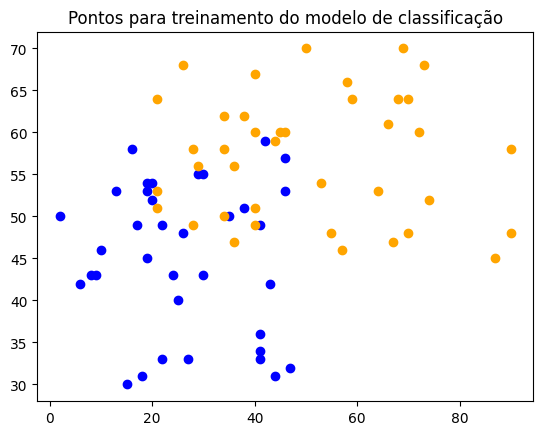

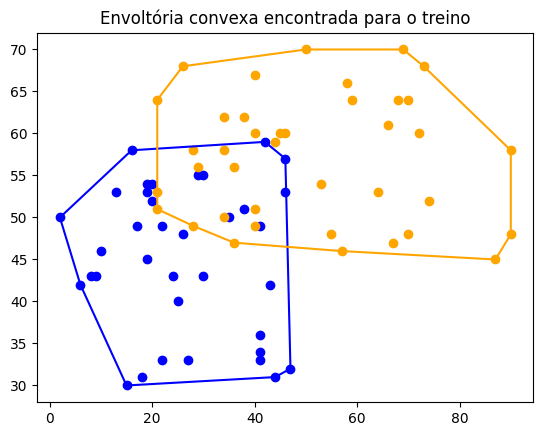

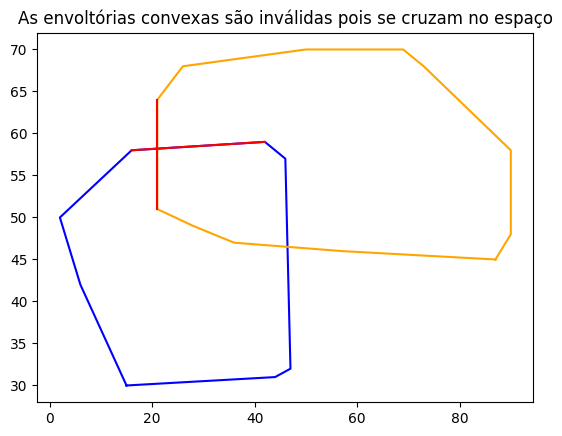

In [66]:
def test1():
    # Geração do dataset
    point_list = generate_random_dataset((1, 50), (30, 60), (20, 90), (45, 70), 50, 50)
    
    # Divisão dos pontos (70% treino - 30% teste)
    train_set, test_set = sk_model_selection.train_test_split(point_list)
    
    classifier(train_set, test_set)

test1()

## Teste 2
O presente teste foi produzido a partir do gerador de *datasets* aleatórios, com o propósito de ilustrar o funcionamento do algoritmo quando há **sobreposição entre as envoltórias convexas**.

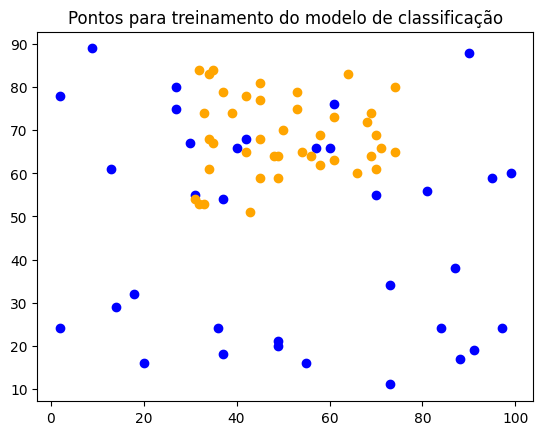

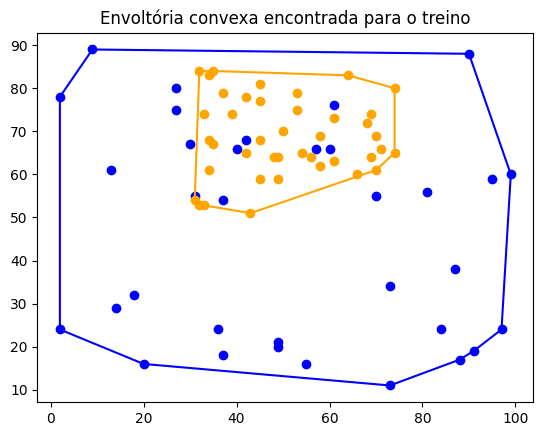

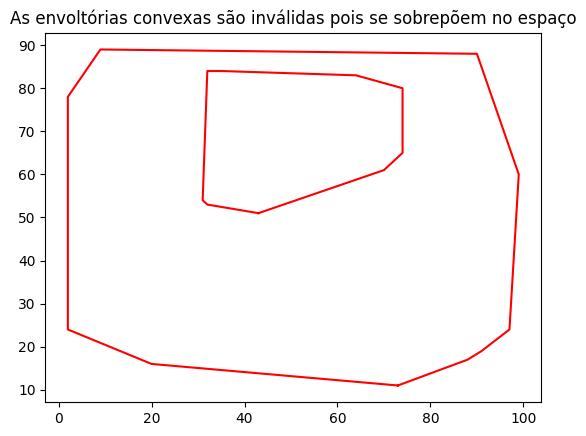

In [67]:
def test2():
    # Geração do dataset
    point_list = generate_random_dataset((1, 100), (10, 90), (30, 75), (50, 85), 50, 50)
    
    # Divisão dos pontos (70% treino - 30% teste)
    train_set, test_set = sk_model_selection.train_test_split(point_list)
    
    classifier(train_set, test_set)

test2()

## Teste 3 (2D)
O presente teste foi produzido a partir do gerador de *datasets* aleatórios, com o propósito de ilustrar o funcionamento do algoritmo quando **as envoltórias convexas são separáveis linearmentes**.

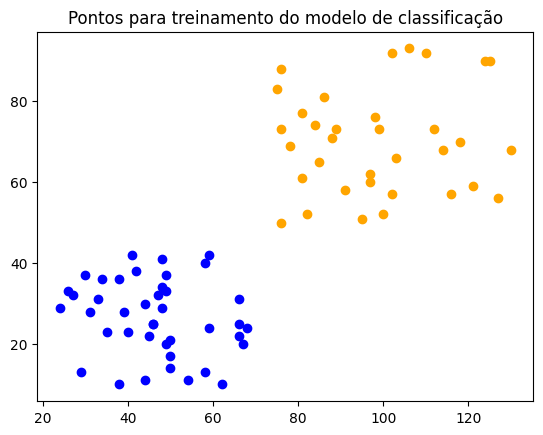

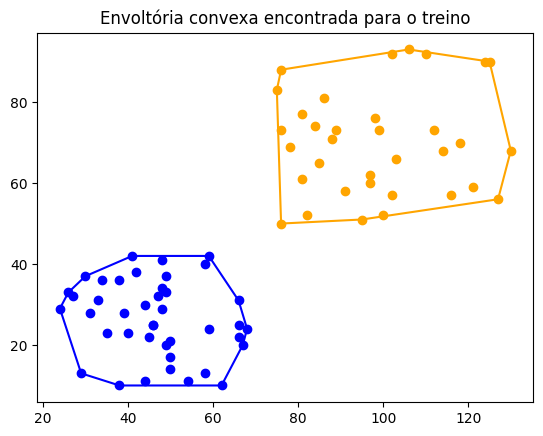

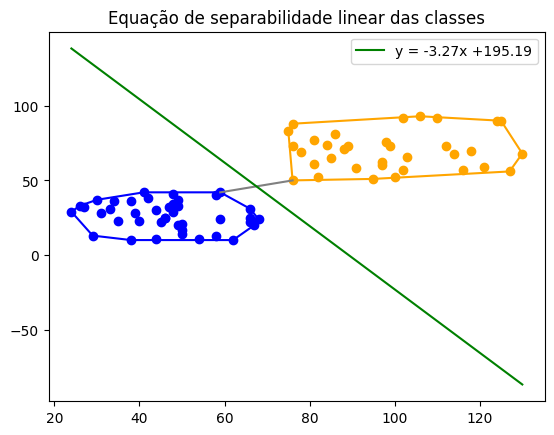

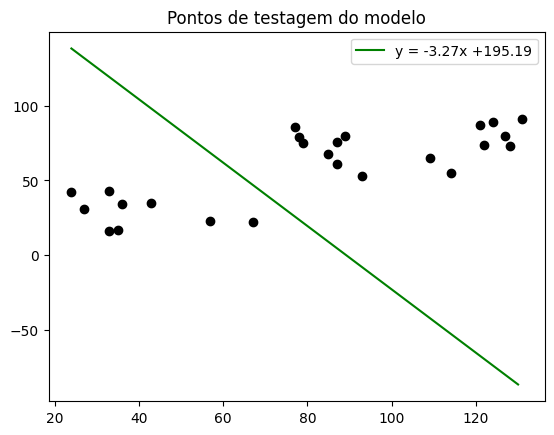

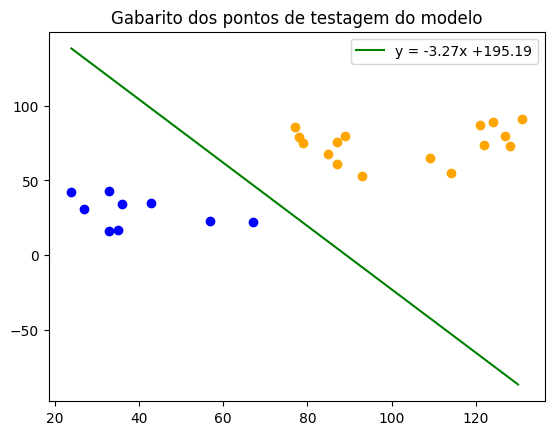

,Precisão,Revocação,f1-escore
0,1.0,1.0,1.0


In [69]:
def test3():
    # Geração do dataset
    point_list = generate_random_dataset((24, 68), (10, 43), (70, 132), (50, 93), 50, 50)
    
    # Divisão dos pontos (70% treino - 30% teste)
    train_set, test_set = sk_model_selection.train_test_split(point_list)
    
    classifier(train_set, test_set)

test3()

## Teste 4 (3D)
Dizer como a base foi obtida, comentar o fato de que a dimensionalidade necessita de tratamento e que isso pode levar a piores resultados de classificação.

## Teste 5 (3D)
Dizer como a base foi obtida, comentar o fato de que a dimensionalidade necessita de tratamento e que isso pode levar a piores resultados de classificação.

## Teste 6 (XD)
Dizer como a base foi obtida, comentar o fato de que a dimensionalidade necessita de tratamento e que isso pode levar a piores resultados de classificação.

## Teste 7 (XD)
Dizer como a base foi obtida, comentar o fato de que a dimensionalidade necessita de tratamento e que isso pode levar a piores resultados de classificação.

## Teste 8 (XD)
Dizer como a base foi obtida, comentar o fato de que a dimensionalidade necessita de tratamento e que isso pode levar a piores resultados de classificação.

## Teste 9 (XD)
Dizer como a base foi obtida, comentar o fato de que a dimensionalidade necessita de tratamento e que isso pode levar a piores resultados de classificação.

## Teste 10 (XD)
Dizer como a base foi obtida, comentar o fato de que a dimensionalidade necessita de tratamento e que isso pode levar a piores resultados de classificação.

# Conclusão
Comentar sobre como o experimento contribuiu para o aprendizado da matéria, como o resultado dos testes foi diferente do ideal, etc...